Rizqy Agusta Primananda - RMT 29

# 1. Perkenalan

Kita akan menganalisis dan menemuka model terbaik pada dataset, dengan metode ANN (Artificial Neural Network)

#2. Import Libraries

In [37]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import Pipeline
import tensorflow as tf
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

#3. Data Loading

In [38]:
df = pd.read_csv('/content/hotel.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,ID00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,ID00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,ID00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,ID00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,ID00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#4. Exploratory Data Analysis

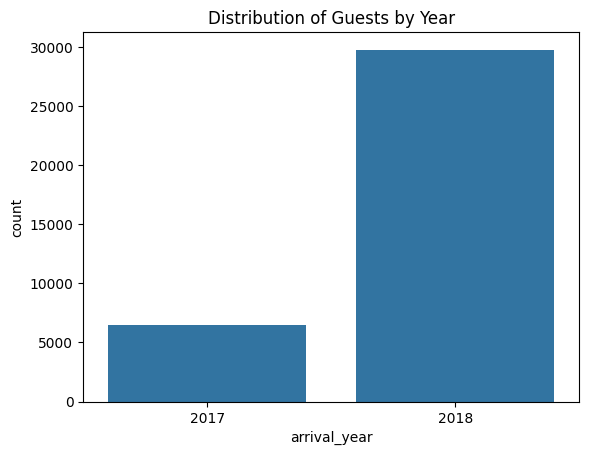

In [39]:
#Mengetahui distribusi tamu berdasarkan tahun
sns.countplot(data=df, x='arrival_year')
plt.title('Distribution of Guests by Year')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

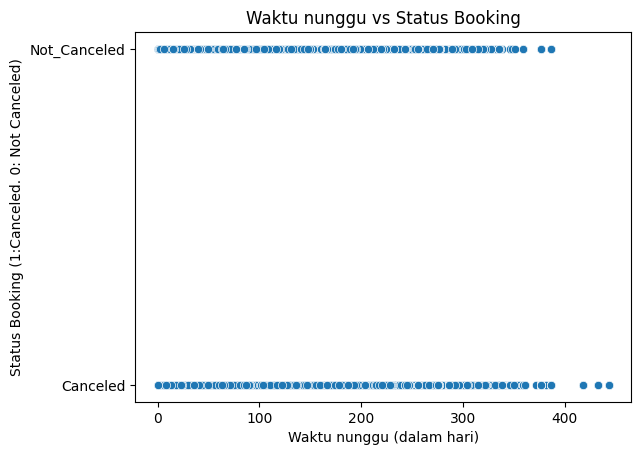

In [40]:
#Analisis hubunngan antara waktu tunggu dan pembatalan tiket hotel
sns.scatterplot(data=df, x='lead_time', y='booking_status')
plt.title('Waktu nunggu vs Status Booking')
plt.xlabel('Waktu nunggu (dalam hari)')
plt.ylabel('Status Booking (1:Canceled. 0: Not Canceled)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

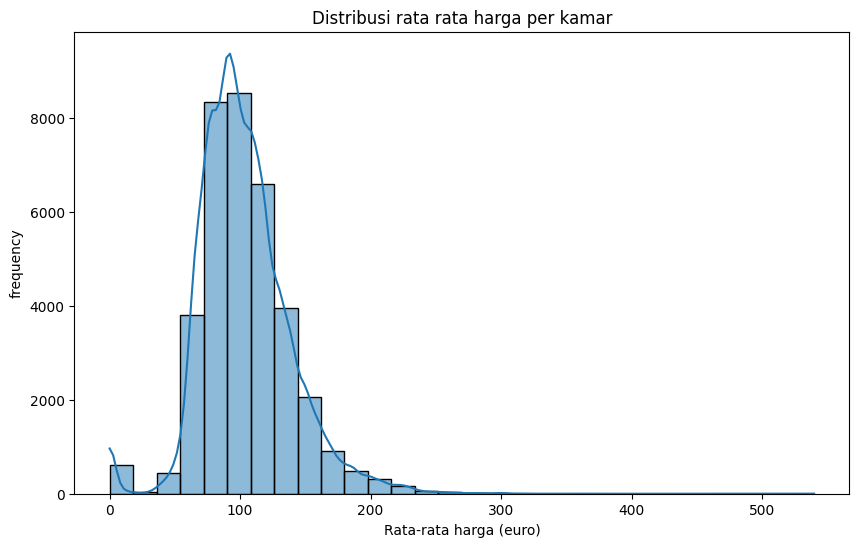

In [41]:
#Harga rata-rata per-kamar
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_price_per_room'], bins=30, kde=True)
plt.title('Distribusi rata rata harga per kamar')
plt.xlabel('Rata-rata harga (euro)')
plt.ylabel('frequency')
plt.show

#5. Feature Engineering

##5.1 Split Data

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [43]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [44]:
df.drop(['Booking_ID'], axis = 1, inplace = True) #buang kolom ga penting

In [45]:
# Splitting between `X` and `y`

X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [46]:
# Replace kategori dengan nilai float
df['booking_status'].replace({'Not_Canceled': 0.0, 'Canceled': 1.0}, inplace=True)

# Ubah tipe data kolom menjadi float
df['booking_status'] = df['booking_status'].astype(float)

In [47]:
df['booking_status']

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
36270    0.0
36271    1.0
36272    0.0
36273    1.0
36274    0.0
Name: booking_status, Length: 36275, dtype: float64

In [48]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (26208, 17)
Val Size   :  (4625, 17)
Test Size  :  (5442, 17)


##5.2 Handling missing value

In [49]:
# Check Missing Values on X_train

X_train.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [50]:
# Check Missing Values on X_val

X_val.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [51]:
# Check Missing Values on X_test

X_test.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

tidak ada missing value

In [52]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [53]:
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
p_values = []
interpretations = []
cols = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['booking_status'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretations.append('Ada korelasi')
    else:
        interpretations.append('Tidak ada korelasi')

result_df = pd.DataFrame({'Nama Kolom': cols, 'P-Value': p_values, 'Interpretasi': interpretations})
print(result_df)

            Nama Kolom        P-Value  Interpretasi
0    type_of_meal_plan   4.951915e-60  Ada korelasi
1   room_type_reserved   1.562780e-10  Ada korelasi
2  market_segment_type  6.748763e-175  Ada korelasi


In [54]:
numeric_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests']
categorical_col = 'booking_status'

p_values = []
interpretations = []
cols = []

for col in numeric_cols:
    groups = [df.loc[df[categorical_col] == val, col] for val in df[categorical_col].unique()]
    f_statistic, p_value = f_oneway(*groups)

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretations.append('Ada korelasi')
    else:
        interpretations.append('Tidak ada korelasi')

result_df = pd.DataFrame({'Nama Kolom': cols, 'P-Value': p_values, 'Interpretasi': interpretations})
print(result_df)

                              Nama Kolom        P-Value  Interpretasi
0                           no_of_adults   8.848338e-62  Ada korelasi
1                         no_of_children   2.947637e-10  Ada korelasi
2                   no_of_weekend_nights   8.340702e-32  Ada korelasi
3                      no_of_week_nights   1.727216e-70  Ada korelasi
4             required_car_parking_space   9.125922e-61  Ada korelasi
5                              lead_time   0.000000e+00  Ada korelasi
6                           arrival_year  2.085779e-260  Ada korelasi
7                          arrival_month   3.239998e-02  Ada korelasi
8                           arrival_date   4.292948e-02  Ada korelasi
9                         repeated_guest   2.523315e-93  Ada korelasi
10          no_of_previous_cancellations   1.315207e-10  Ada korelasi
11  no_of_previous_bookings_not_canceled   1.828736e-30  Ada korelasi
12                no_of_special_requests   0.000000e+00  Ada korelasi


## 5.3 Handling Outliers

In [55]:
#Skew Check
X_train_num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in X_train_num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,no_of_adults,-0.343966
1,no_of_children,4.947919
2,no_of_weekend_nights,0.730706
3,no_of_week_nights,1.551878
4,required_car_parking_space,5.296406
5,lead_time,1.289112
6,arrival_year,-1.665760
7,arrival_month,-0.344031
8,arrival_date,0.027392
9,repeated_guest,5.926551


##5.4 Pipeline

In [56]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns:', num_columns)
print('Categorical Columns:', cat_columns)


Numerical Columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical Columns: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [57]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OrdinalEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [58]:
# Fit and Transform


X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(26208, 17)

#6. ANN Training - Sequential API

##6a. Model Definition

In [59]:
# Clear session

import tensorflow as tf
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [60]:
# Create Sequential API
# Define model
model_sequential = Sequential()
model_sequential.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_sequential.add(Dense(1, activation='sigmoid'))



# Compile model
model_sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


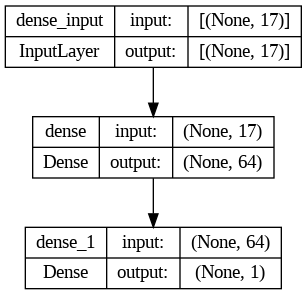

In [64]:
# Plot layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

##6b. Model Training

In [65]:
# Train model
history_sequential = model_sequential.fit(X_train,
                                          y_train,
                                          epochs=20,
                                          validation_split=0.2,
                                          batch_size=10)

Epoch 1/20
2097/2097 [==============================] - 5s 2ms/step - loss: 0.4463 - accuracy: 0.7899 - val_loss: 0.4188 - val_accuracy: 0.8102
Epoch 2/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4058 - accuracy: 0.8103 - val_loss: 0.4050 - val_accuracy: 0.8153
Epoch 3/20
2097/2097 [==============================] - 5s 2ms/step - loss: 0.3940 - accuracy: 0.8197 - val_loss: 0.3951 - val_accuracy: 0.8213
Epoch 4/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.3873 - accuracy: 0.8247 - val_loss: 0.3888 - val_accuracy: 0.8245
Epoch 5/20
2097/2097 [==============================] - 5s 2ms/step - loss: 0.3805 - accuracy: 0.8308 - val_loss: 0.3877 - val_accuracy: 0.8296
Epoch 6/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8325 - val_loss: 0.3849 - val_accuracy: 0.8281
Epoch 7/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8343 - val_loss: 0.3820 - val_accuracy:

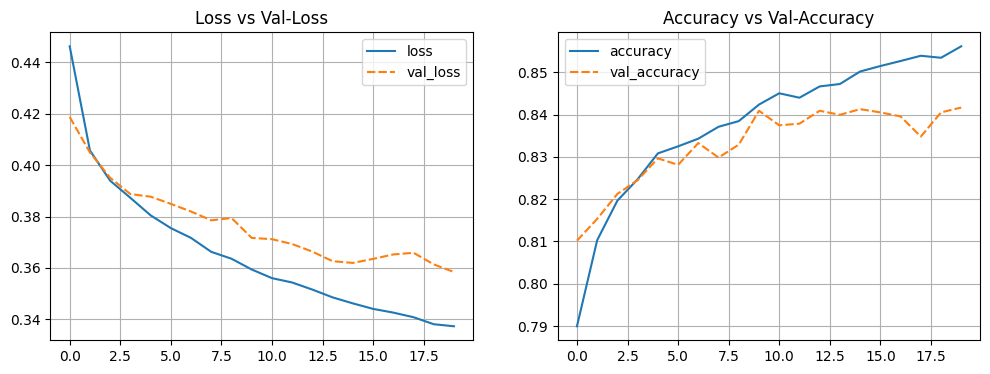

In [66]:
# Ubah history dari objek keras.history menjadi dictionary
history_dict = history_sequential.history

# Buat DataFrame dari history dictionary
history_sequential_df = pd.DataFrame(history_dict)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_sequential_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_sequential_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [67]:
# Predict test-set

model_sequential.predict(X_test)

171/171 [==============================] - 0s 1ms/step


array([[9.5938063e-05],
       [1.2853683e-02],
       [6.5839127e-02],
       ...,
       [7.3023759e-02],
       [5.0061405e-01],
       [1.7610566e-01]], dtype=float32)

In [68]:
# Model Evaluation (test-set)

y_pred_sequential = model_sequential.predict(X_test)
y_pred_sequential_class = np.where(y_pred_sequential >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_sequential_class))

171/171 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      3598
         1.0       0.80      0.75      0.77      1844

    accuracy                           0.85      5442
   macro avg       0.83      0.82      0.83      5442
weighted avg       0.85      0.85      0.85      5442



#7. ANN Training Functional API

##7a. Model Definition

In [74]:
# Clear session

import tensorflow as tf
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [75]:
# Create functional model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(17,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)) (concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 17)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   288       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 8)                    136       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 25)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

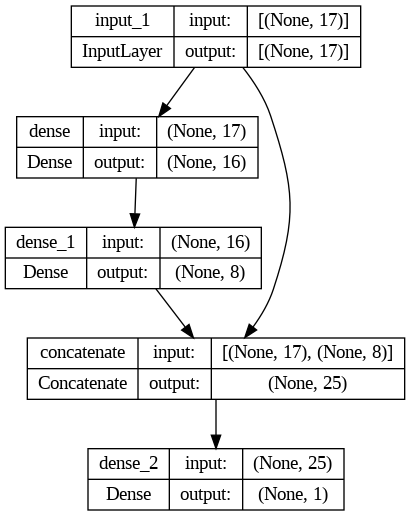

In [76]:
# Plot layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

##7b. Model Training

In [77]:
# Train the model

%%time
history_functional = model_functional.fit(X_train,
                                          y_train,
                                          epochs=20,
                                          validation_data=(X_val, y_val),
                                          batch_size=10)

Epoch 1/20
2621/2621 [==============================] - 7s 2ms/step - loss: 0.5012 - accuracy: 0.7603 - val_loss: 0.4449 - val_accuracy: 0.7946
Epoch 2/20
2621/2621 [==============================] - 6s 2ms/step - loss: 0.4307 - accuracy: 0.7996 - val_loss: 0.4183 - val_accuracy: 0.8110
Epoch 3/20
2621/2621 [==============================] - 5s 2ms/step - loss: 0.4106 - accuracy: 0.8148 - val_loss: 0.4054 - val_accuracy: 0.8151
Epoch 4/20
2621/2621 [==============================] - 5s 2ms/step - loss: 0.3987 - accuracy: 0.8219 - val_loss: 0.4013 - val_accuracy: 0.8199
Epoch 5/20
2621/2621 [==============================] - 6s 2ms/step - loss: 0.3912 - accuracy: 0.8241 - val_loss: 0.3945 - val_accuracy: 0.8221
Epoch 6/20
2621/2621 [==============================] - 5s 2ms/step - loss: 0.3870 - accuracy: 0.8250 - val_loss: 0.3889 - val_accuracy: 0.8279
Epoch 7/20
2621/2621 [==============================] - 6s 2ms/step - loss: 0.3831 - accuracy: 0.8306 - val_loss: 0.3838 - val_accuracy:

##7c. Model Evaluation

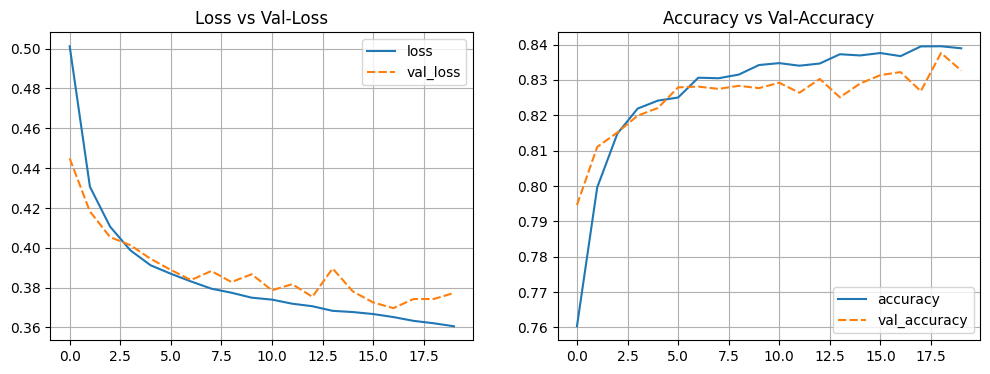

In [78]:
# Plot training results

history_functional_df = pd.DataFrame(history_functional.history)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_functional_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_functional_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [79]:
# Model Evaluation (test-set)

y_pred_functional = model_functional.predict(X_test)
y_pred_functional_class = np.where(y_pred_functional >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_functional_class))

171/171 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      3598
         1.0       0.78      0.74      0.76      1844

    accuracy                           0.84      5442
   macro avg       0.82      0.82      0.82      5442
weighted avg       0.84      0.84      0.84      5442



#8. Model Saving

In [80]:
# Save pipeline

import pickle
with open('hotel_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [81]:
# Model summary

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# Freeze model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1217 (4.75 KB)
_________________________________________________________________


In [83]:
# Save ANN model

model_sequential.save('hotel_model.keras')

Model improvement - transfer learning

#Keismpulan

Dengan demikian, kesimpulan yang dapat diambil adalah bahwa analisis yang mendalam tentang data 'booking_status' dapat memberikan pemahaman yang lebih baik tentang pola-pola dan faktor-faktor yang mempengaruhi keputusan pembatalan pemesanan, sehingga membantu dalam pengambilan keputusan yang lebih baik dalam operasi hotel.







